#### DSC630
###### Xin Tang
###### Week1 assignment: Python refresher

------------------

###### Summary of the dataset and 2 questions to explore visually
Data description:
This is a dataset from Kaggle.com. (https://www.kaggle.com/datasets/zarexx/pakwheels-used-cars-dataset) It contains the used car sale info from various locations in country of Pakistain. The data has 13 columns and more than 75K sales records. 

I am interested in car and actually thinking of buying a used car for my son. though this dataset may not help my purchase but I would like to find out 2 things:
1. what yead of car are most popular
2. relationship between price and year of the car in the most popular car brand

In [3]:
# import data and packages
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data is downloaded into my local folder so I just import it
df = pd.read_csv('Pakwheels.csv')

In [5]:
# check the data structure and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75743 entries, 0 to 75742
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              75743 non-null  object
 1   Brand             75743 non-null  object
 2   PriceInText       75743 non-null  object
 3   Price_Numeric     75743 non-null  int64 
 4   City              75743 non-null  object
 5   Year              75743 non-null  int64 
 6   Distance          75743 non-null  object
 7   Distance_Numeric  75743 non-null  int64 
 8   Fuel              75743 non-null  object
 9   HorsePower        75743 non-null  object
 10  Transmission      75743 non-null  object
 11  Certified         75743 non-null  object
 12  ManagedBy         75743 non-null  object
dtypes: int64(3), object(10)
memory usage: 7.5+ MB


In [6]:
# get a peek of the data
df.head()

,Name,Brand,PriceInText,Price_Numeric,City,Year,Distance,Distance_Numeric,Fuel,HorsePower,Transmission,Certified,ManagedBy
0,Toyota Prado 2018 TX L Package 2.7,Toyota,PKR 3.85 crore,38500000,Lahore,2018,"20,012km",20012,Petrol,2700cc,Automatic,Not Certified,Customer
1,Toyota Corolla 2016 XLi VVTi,Toyota,PKR 32.5 lacs,3250000,Lahore,2016,123km,123,Petrol,1300cc,Manual,Not Certified,Customer
2,Honda City 2021 1.3 i-VTEC,Honda,PKR 40 lacs,4000000,Lahore,2021,"15,800km",15800,Petrol,1300cc,Manual,Not Certified,Customer
3,Mitsubishi Galant 1998 1.8 VX,Mitsubishi,PKR 10.75 lacs,1075000,Bahawalpur,1998,"12,345km",12345,Petrol,1800cc,Manual,Not Certified,Customer
4,Mercedes Benz E Class 1987,Mercedes,PKR 15 lacs,1500000,Peshawar,1987,"1,234km",1234,Petrol,2300cc,Manual,Not Certified,Customer


In [7]:
# check unique values
cols = df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
print(Unique_Values())
df.info()
print('variables with NA values', df.isna().sum())

There are 8993 of unique values in Name column out of 75743
There are 65 of unique values in Brand column out of 75743
There are 2336 of unique values in PriceInText column out of 75743
There are 2336 of unique values in Price_Numeric column out of 75743
There are 325 of unique values in City column out of 75743
There are 70 of unique values in Year column out of 75743
There are 8898 of unique values in Distance column out of 75743
There are 8898 of unique values in Distance_Numeric column out of 75743
There are 5 of unique values in Fuel column out of 75743
There are 214 of unique values in HorsePower column out of 75743
There are 2 of unique values in Transmission column out of 75743
There are 2 of unique values in Certified column out of 75743
There are 2 of unique values in ManagedBy column out of 75743
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75743 entries, 0 to 75742
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------          

In [6]:
# data is quite clean, so go to visualization

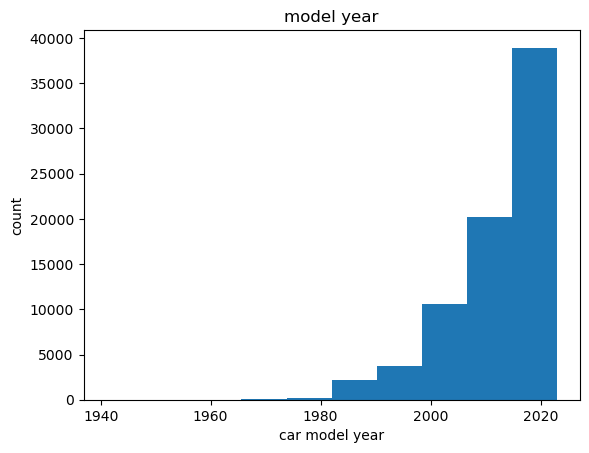

In [8]:
# Create a histogram or bar graph from your data.
# try to show model year distribution in histogram
plt.hist(df['Year'])
plt.xlabel('car model year')
plt.ylabel('count')
plt.title('model year')
plt.show()

###### from plot above, most car in year 2000 and newer. year 2020 have most car sales.

Text(0, 0.5, 'year')

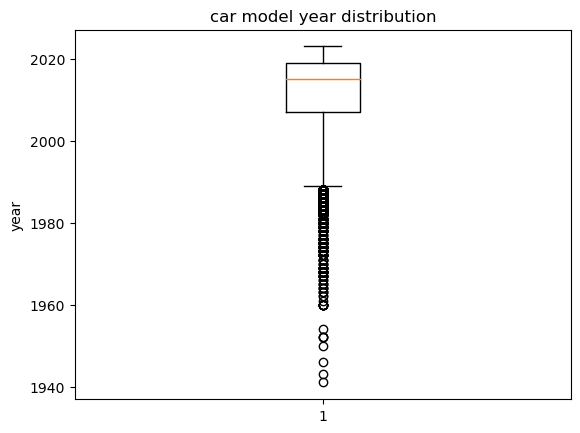

In [8]:
# Crate a box plot from data
# create box plot on model years 
plt.boxplot( df['Year'])
plt.title('car model year distribution')
plt.ylabel('year')

###### This also shows majority of sales on car made between 2010 to 2020 

Text(0.5, 1.0, 'Top 10 Selling Cars')

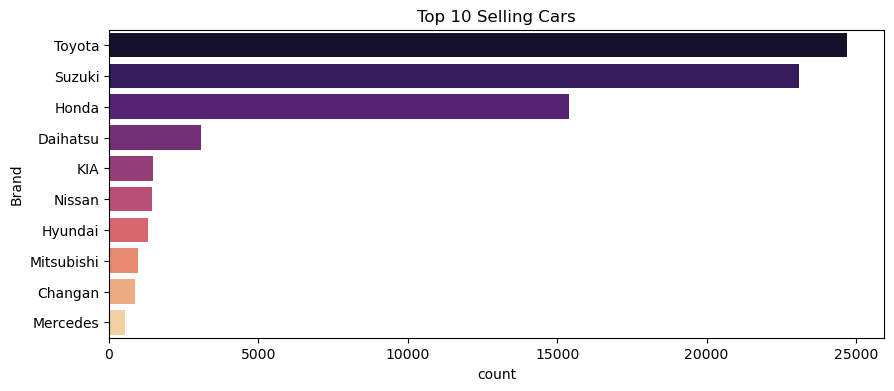

In [9]:
# Find top 10 car brand with most sales
# this also serve purpose of using another visualization method
import seaborn as sns

plt.figure(figsize=(10,4))
top_car = df['Brand'].value_counts().nlargest(10)
sns.countplot(y=df.Brand, order=top_car.index, palette='magma').set_title('Top 10 Selling Cars')

###### looks like toyota is the most popluar car brand in used car sales.

Text(0, 0.5, 'Sales Price in thoudsand US$')

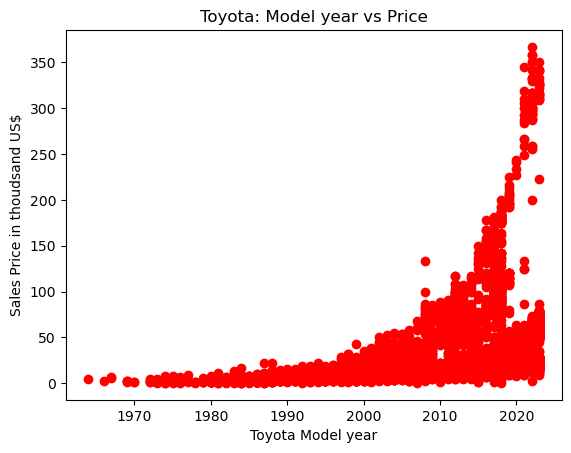

In [10]:
# Create a bivariate plot from your data.
# Do a scatter chart between price and model year on toyota cars
# Convert price into US$ to make it more readable

#filter out toyota first
toyota = df[df['Brand'] == 'Toyota']

x = toyota['Year']
y = toyota['Price_Numeric']/300000
plt.ticklabel_format(axis='x', style='sci', useLocale= True)
plt.scatter(x, y, color = 'red')
plt.title('Toyota: Model year vs Price')
plt.xlabel('Toyota Model year')
plt.ylabel('Sales Price in thoudsand US$')

###### looks like newer car can be traded at higher price, but it is interesting that car could be sold >$300K

##### Conclusion

From the above visulization and comments from charts. my 2 questions were answered:
1. In Pakistan, cars made between 2010-2020 are most pouplar in used car market
2. Toyota is the most popular used car, the newer model can be sold at higher price. but some car are sold in unreasonable price.

The visulization is very strong to delivery the message and make info easy to understand. As shown in above examples, it makes complex numbers easier to understand and communicate. it identify patterns and relationships. it also reveal interesting thing for further analysis. like in above case, why some used toyota could be sold >$300K.

In [11]:
# End